## (SVD) Time Series Anomaly Detection

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils import load_csv

In [2]:
df = load_csv('../test/data/jhapp_1m_tps_jyonline_jyonlineAll_9.csv', time_delta='8h')

Do row2col!


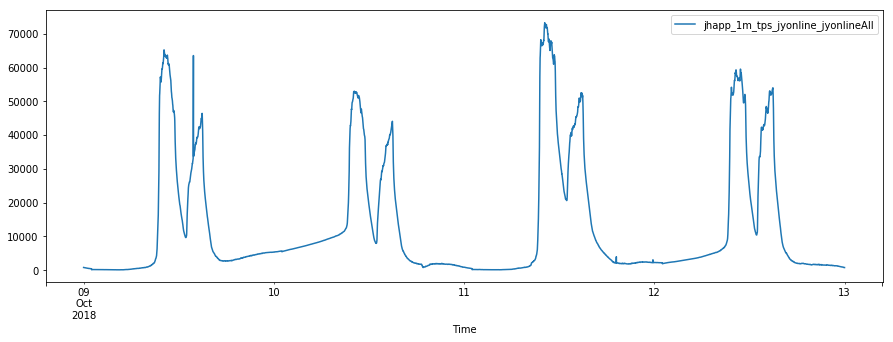

In [3]:
df.loc['2018-10-09':'2018-10-12'].plot(figsize=(15, 5))

In [4]:
values = df.loc['2018-10-09':'2018-10-12'].values

In [5]:
values, values.shape

(array([[821.],
        [813.],
        [802.],
        ...,
        [805.],
        [806.],
        [801.]]), (5760, 1))

In [158]:
def series2matrix(x):
    if isinstance(x, np.ndarray):
        x = x.ravel().tolist()
    if len(x) % 2 == 0:
        x.append(np.nan)
    n = len(x) // 2
    data = []
    for i in range(n):
        data.append(x[i:i+n])
    return np.asarray(data)

In [161]:
matest = series2matrix(df.loc['2018-10-09':'2018-10-12'].values); matest

array([[821., 813., 802., ..., 898., 912., 900.],
       [813., 802., 806., ..., 912., 900., 911.],
       [802., 806., 805., ..., 900., 911., 894.],
       ...,
       [898., 912., 900., ..., 821., 852., 810.],
       [912., 900., 911., ..., 852., 810., 805.],
       [900., 911., 894., ..., 810., 805., 806.]])

In [164]:
df.loc['2018-10-09':'2018-10-12'].values

array([[821.],
       [813.],
       [802.],
       ...,
       [805.],
       [806.],
       [801.]])

In [159]:
# conver time series to matrix
step = 1
lag = 5760//2
data = []
values = df.loc['2018-10-09':'2018-10-12'].values.ravel().tolist()
for i in range(0, len(values)-lag):
    data.append(values[i:i+lag])
mat = np.asarray(data, dtype='f8')

In [46]:
mat

array([[821., 813., 802., ..., 898., 912., 900.],
       [813., 802., 806., ..., 912., 900., 911.],
       [802., 806., 805., ..., 900., 911., 894.],
       ...,
       [898., 912., 900., ..., 821., 852., 810.],
       [912., 900., 911., ..., 852., 810., 805.],
       [900., 911., 894., ..., 810., 805., 806.]])

In [105]:
u, s, vh = np.linalg.svd(mat)

In [106]:
u.shape, s.shape, vh.shape

((2880, 2880), (2880,), (2880, 2880))

In [107]:
mat

array([[821., 813., 802., ..., 898., 912., 900.],
       [813., 802., 806., ..., 912., 900., 911.],
       [802., 806., 805., ..., 900., 911., 894.],
       ...,
       [898., 912., 900., ..., 821., 852., 810.],
       [912., 900., 911., ..., 852., 810., 805.],
       [900., 911., 894., ..., 810., 805., 806.]])

In [149]:
s1 = np.zeros_like(s)
s1[:-2000] = s[:-2000]

In [150]:
mat1 = np.dot(np.dot(u, np.diag(s1)), vh);mat1

array([[ 895.20375436,  868.94944786, 1052.152132  , ...,  936.89085054,
         849.71697052,  670.83139138],
       [ 868.94944788,  588.63539969,  952.04089985, ...,  941.99106211,
         869.56471694,  818.48567136],
       [1052.152132  ,  952.04089986,  872.73666746, ...,  780.68677304,
         726.51023898,  697.70143044],
       ...,
       [ 936.89085054,  941.99106211,  780.68677304, ...,  692.82231161,
         715.94159663,  753.29092147],
       [ 849.71697052,  869.56471694,  726.51023898, ...,  715.94159663,
         760.13021475,  797.95191392],
       [ 670.83139138,  818.48567136,  697.70143043, ...,  753.29092147,
         797.95191392,  843.13087257]])

In [145]:
np.dot(np.dot(u, np.diag(s)), vh)

array([[821.        , 812.99999999, 802.        , ..., 898.        ,
        912.        , 900.        ],
       [813.        , 802.        , 806.        , ..., 912.        ,
        900.        , 911.        ],
       [802.        , 806.        , 805.        , ..., 900.        ,
        911.        , 894.        ],
       ...,
       [898.        , 912.        , 900.        , ..., 821.        ,
        852.        , 810.        ],
       [912.        , 900.        , 911.        , ..., 852.        ,
        810.        , 805.        ],
       [900.        , 911.        , 894.        , ..., 810.        ,
        805.        , 806.        ]])

In [123]:
def mat2series(mat):
    first_row = mat[0, :].tolist()
    others = []
    for i in range(1, mat.shape[0]):
        others.append(mat[i, -1])
    return np.asarray(first_row+others)

In [136]:
mat

array([[821., 813., 802., ..., 898., 912., 900.],
       [813., 802., 806., ..., 912., 900., 911.],
       [802., 806., 805., ..., 900., 911., 894.],
       ...,
       [898., 912., 900., ..., 821., 852., 810.],
       [912., 900., 911., ..., 852., 810., 805.],
       [900., 911., 894., ..., 810., 805., 806.]])

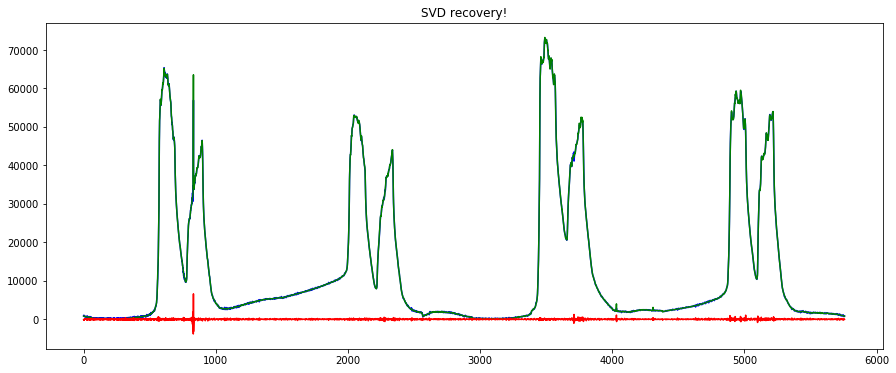

In [154]:
plt.figure(figsize=(15, 6))
plt.plot(mat2series(mat1), 'b')
plt.plot(mat2series(mat), 'g')
plt.plot(mat2series(mat)-mat2series(mat1), 'r')
plt.title('SVD recovery!')
plt.show()

In [128]:
mat2series(mat) == values

/home/jly/Desktop/Codes/DynamicThresholdAlgorithm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [96]:
pca = PCA(n_components=2000)
pca.fit(mat)

PCA(copy=True, iterated_power='auto', n_components=2000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
mat

array([[821., 813., 802., ..., 898., 912., 900.],
       [813., 802., 806., ..., 912., 900., 911.],
       [802., 806., 805., ..., 900., 911., 894.],
       ...,
       [898., 912., 900., ..., 821., 852., 810.],
       [912., 900., 911., ..., 852., 810., 805.],
       [900., 911., 894., ..., 810., 805., 806.]])

In [99]:
pca.components_

array([[-0.00218801, -0.00228257, -0.00237703, ...,  0.00099973,
         0.00087295,  0.00074622],
       [-0.02165497, -0.021632  , -0.02160862, ..., -0.02920395,
        -0.02919089, -0.02917724],
       [ 0.00536965,  0.0055662 ,  0.00576233, ...,  0.00266068,
         0.00292154,  0.00318225],
       ...,
       [ 0.00755445,  0.00091111,  0.01200768, ..., -0.00761841,
         0.0349863 , -0.03287144],
       [-0.00533162,  0.00177758,  0.00510599, ..., -0.00658865,
         0.0133894 , -0.03019604],
       [-0.00184239,  0.00231888, -0.0039004 , ...,  0.00472155,
        -0.02319226,  0.00434656]])